Naive Bayes Training Accuracy: 0.6900254309126872
Bernoulli Naive Bayes Classifier:
Accuracy: 0.6711864406779661
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       442
           1       0.74      0.72      0.73       284
    Enrolled       0.34      0.31      0.33       159

    accuracy                           0.67       885
   macro avg       0.61      0.60      0.60       885
weighted avg       0.67      0.67      0.67       885

Confusion Matrix:
 [[339  44  59]
 [ 42 205  37]
 [ 81  28  50]]
Random Forest Training Accuracy: 1.0

Random Forest Classifier:
Accuracy: 0.7830508474576271
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       442
           1       0.83      0.81      0.82       284
    Enrolled       0.56      0.31      0.40       159

    accuracy                           0.78       885
   macro avg       0.73     

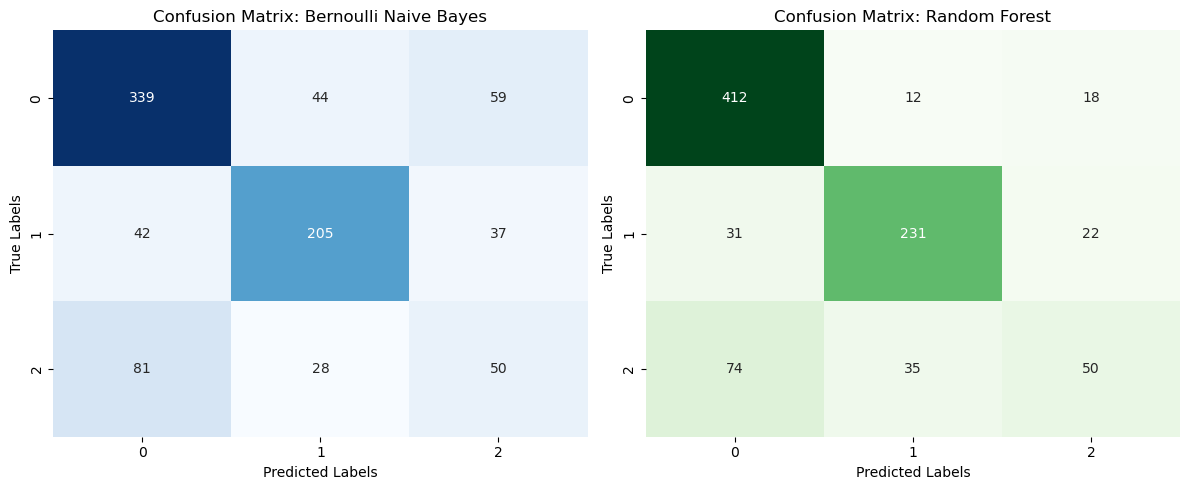

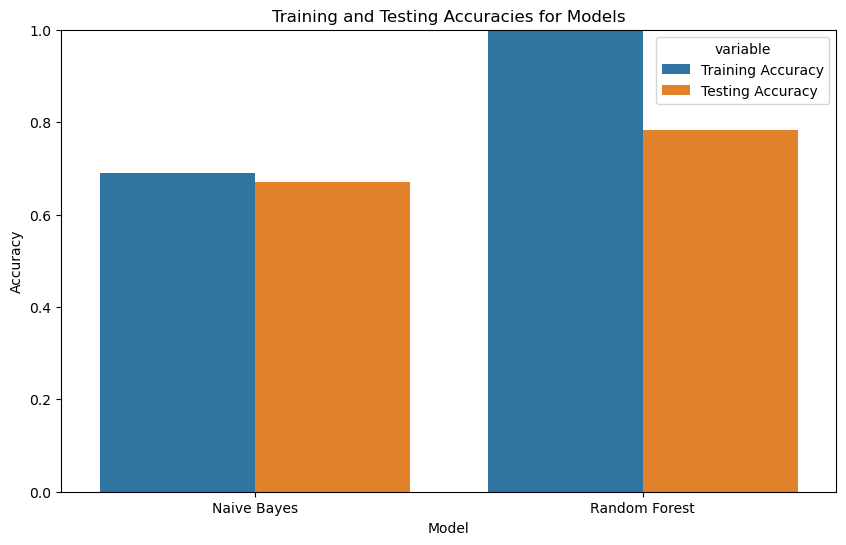

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = 'C:\\Users\\Shruti\\Downloads\\df_one_hot_encoded_normalized.csv'
data = pd.read_csv(file_path)

# Extract features and target
target_column = 'Target'
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
bnb = BernoulliNB()
rf = RandomForestClassifier(random_state=42, n_estimators=200)

# Train the Bernoulli Naive Bayes model
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

# Train and predict with Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Training accuracy and evaluation for Naive Bayes
y_train_pred_nbc = bnb.predict(X_train)
print("Naive Bayes Training Accuracy:", accuracy_score(y_train, y_train_pred_nbc))

# Evaluate Bernoulli Naive Bayes
print("Bernoulli Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("Classification Report:\n", classification_report(y_test, y_pred_bnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))

# Training accuracy and evaluation for Random Forest
y_train_pred_rf = rf.predict(X_train)
print("Random Forest Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
# Evaluate Random Forest
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Redefining variables and recalculating metrics to ensure proper plotting

# Generate confusion matrices again for correct visualization
cm_bnb = confusion_matrix(y_test, bnb.predict(X_test))
cm_rf = confusion_matrix(y_test, rf.predict(X_test))

# Plot confusion matrix for Bernoulli Naive Bayes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_bnb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix: Bernoulli Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Plot confusion matrix for Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

# Visualize accuracies
accuracies = {
    "Model": ["Naive Bayes", "Random Forest"],
    "Training Accuracy": [accuracy_score(y_train, bnb.predict(X_train)), accuracy_score(y_train, rf.predict(X_train))],
    "Testing Accuracy": [accuracy_score(y_test, bnb.predict(X_test)), accuracy_score(y_test, rf.predict(X_test))],
}

accuracy_df = pd.DataFrame(accuracies)

# Bar plot for accuracies
plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Training and Testing Accuracies for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()



In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Bernoulli Naive Bayes
bnb_params = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Smoothing parameter
    'binarize': [0.0, 0.1, 0.2, 0.5, 1.0]  # Threshold for binarization of input features
}

bnb_grid = GridSearchCV(BernoulliNB(), param_grid=bnb_params, cv=5, scoring='accuracy', n_jobs=-1)
bnb_grid.fit(X_train, y_train)

# Best parameters for Bernoulli Naive Bayes
best_bnb_params = bnb_grid.best_params_

# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best parameters for Random Forest
best_rf_params = rf_grid.best_params_

# Re-train models with best parameters
best_bnb = BernoulliNB(**best_bnb_params)
best_bnb.fit(X_train, y_train)
y_pred_best_bnb = best_bnb.predict(X_test)

best_rf = RandomForestClassifier(random_state=42, **best_rf_params)
best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate and compare new models
bnb_accuracy_tuned = accuracy_score(y_test, y_pred_best_bnb)
rf_accuracy_tuned = accuracy_score(y_test, y_pred_best_rf)

# Display results
results_tuned = {
    "Model": ["Bernoulli Naive Bayes", "Random Forest"],
    "Accuracy": [bnb_accuracy_tuned, rf_accuracy_tuned],
    "Best Parameters": [best_bnb_params, best_rf_params]
}
results_tuned



,Model,Accuracy,Best Parameters
0,Bernoulli Naive Bayes,0.671186,"{'alpha': 2.0, 'binarize': 0.0}"
1,Random Forest,0.776271,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
